## 課題

### 標準大気

縦軸を気圧（hPa）にして[標準大気](https://ja.wikipedia.org/wiki/%E5%9B%BD%E9%9A%9B%E6%A8%99%E6%BA%96%E5%A4%A7%E6%B0%97)を描画したい。`import matplotlib.pyplot as plt`となっているものとする。

1. まず対応する気圧をリストにして`plot()`を用いて描いてみよ。どのような問題があるか。
2. `plt.plot()`の代わりに`pltsemilog()`を用いるとどう変化するか。依然残る不自然な点を指摘せよ。
3. `plt.gca().invert_yaxis()`を追加するとどのようになるか。
4. `plt.title(), plt.xlabel(), plt.ylabel()`を用いてタイトルと軸ラベルを付加せよ。

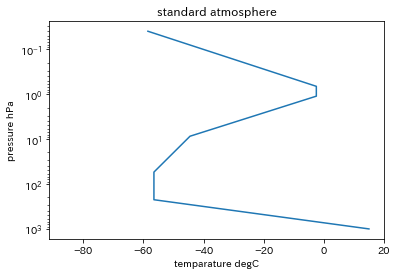

In [1]:
import matplotlib.pyplot as plt
T = [15.0, -56.5, -56.5, -44.5, -2.5, -2.5, -58.5, -86.2]
p = []
plt.plot(T, p)
#plt.semilogy(T, p)
#plt.gca().invert_yaxis()
#plt.title('')
#plt.xlabel('')
#plt.ylabel('')
plt.show()

### 天気予報

天気予報のノートブックの`weather.py`モジュールを使う。

1. このモジュールには，重大な不具合を発見せよ。
2. バクを修正するにはどのようにすればよいか。ヒントバグの該当箇所をf-string `f'city:06d'`で置き換える。
  * [f-string](https://docs.python.jp/3/reference/lexical_analysis.html#f-strings)
  * [formatspec](https://docs.python.jp/3/library/string.html#formatspec)
3. 出身地に最も近い地点の天気予報を表示せよ。

In [2]:
import weather

In [3]:
weather.forecast(weather.loc['稚内'])

道北 稚内 の天気
 北海道付近は、20日夜から21日にかけて、オホーツク海から北海道の
南東海上に中心を移す高気圧に覆われますが、21日夜には日本海から気圧
の谷が近づく見込みです。

 宗谷地方の20日15時の天気は、晴れ又は曇りとなっています。

 20日夜は、晴れのち曇りでしょう。

 21日は、晴れの見込みです。

 海の波の高さは、20日夜は1メートルでしょう。21日は1メートルの
ち1.5メートルとやや高くなる見込みです。

今日　（2017-08-20）晴のち曇　　　 -- --
明日　（2017-08-21）晴れ　　　　　 19 25
明後日（2017-08-22）曇時々晴　　　 -- --


### 海面水温

1. 生まれた年月の海面水温偏差を図示せよ。ただし気候値は授業で作成した1961～1990年とする。
2. 1961～1990年のNINO.3の海面水温5か月移動平均値において，エルニーニョに加えてラニーニャ期間も同定し，`plt.axvspan()`を用いてエルニーニョとラニーニャの期間を分かりやすく図示せよ。

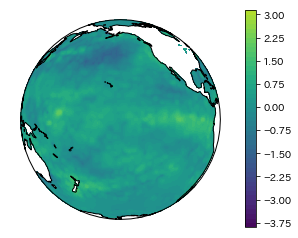

In [4]:
import netCDF4 as nc4
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

from datetime import date
dates = np.array([date(y, m+1, 15) for y in range(1961, 1991) for m in range(12)])
birthday = date(1969, 12, 15)
i = np.where(dates==birthday)

f = nc4.Dataset('HadISST1_SST_1961-1990.nc')
# 90年生まれより若い人はhadisst1.readtxt()を使う。
lon =f.variables['lon'][:]
lat = f.variables['lat'][:]
sst = f.variables['sst'][i]

fc = nc4.Dataset('HadISST1_SST_1961-1990_clim.nc')

sst_clim = fc.variables['sst'][birthday.month-1,]

dsst, lonc = add_cyclic_point(sst[0,]-sst_clim, lon)

ax = plt.axes(projection=ccrs.Orthographic(central_longitude=210))

plt.contourf(lonc, lat, dsst, 60, transform=ccrs.PlateCarree(), vmin = -4, vmax = 4)
plt.colorbar()

ax.coastlines()

plt.show()

f.close()
fc.close()